# Image denoising using auto_Encoders

### Loading and reshaping the dataset

In [1]:
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

# Downloading the dataset
(x_train, _), (x_test, _) = mnist.load_data()

# reshape the data for 3-D using Channel Last
x_train = x_train.astype('float32')/255
x_test= x_test.astype('float32')/255

11490434/11490434 [==============================] - 0s 0us/step


### 3D images available for training and testing

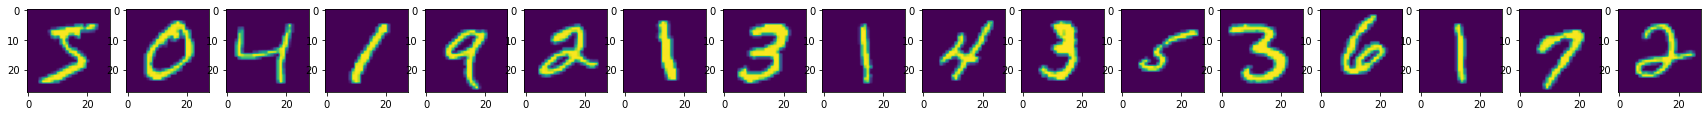

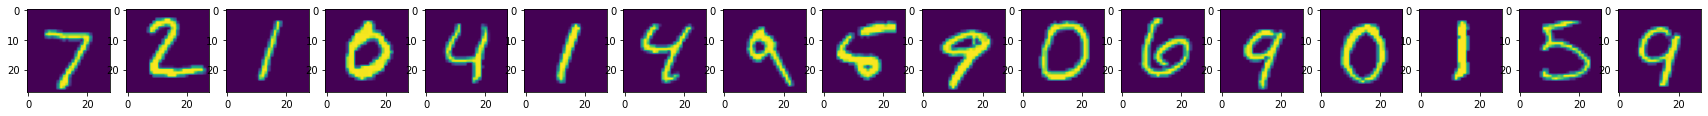

In [2]:
# 3D Images are available for training and testing
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Plot the original training data
plt.figure(figsize = (30,6))
for i in range(17):
  plt.subplot(1, 17, i+1)
  plt.imshow(x_train[i].reshape(28,28))
plt.show()

# Plot the testing data
plt.figure(figsize = (30,6))
for i in range(17):
  plt.subplot(1, 17, i+1)
  plt.imshow(x_test[i].reshape(28,28))
plt.show()

### Adding gaussian and uniform noise to training and testing dataset

In [3]:
# Now put some noice in original data
amt_noise = 0.1 # % of noise put in the original data

# Adding uniform and gaussian noise to training and testing dataset
x_train_noisy = x_train + amt_noise * np.random.uniform(low=0.0, high=7.4, size=x_train.shape) + amt_noise * np.random.normal(loc=0.0, scale=2.0, size=x_train.shape)
x_test_noisy = x_test + amt_noise * np.random.uniform(low=0.0, high=8.9, size=x_test.shape) + amt_noise * np.random.normal(loc=0.0, scale=2.0, size=x_test.shape)
x_test

# Clipped the values from 0 to 7 to normalize the data
x_train_noisy = np.minimum(7, np.maximum(x_train_noisy, 0)) 
x_test_noisy = np.minimum(7, np.maximum(x_test_noisy, 0))

### Plotting the noisy training and testing dataset

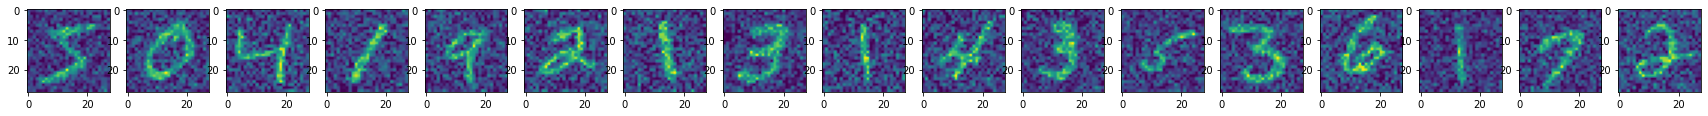

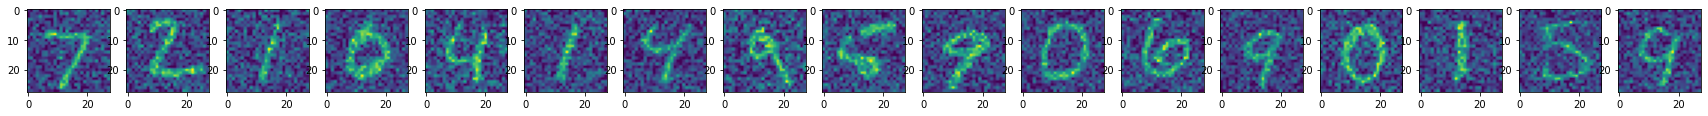

In [4]:
# Plot the noisy training data
plt.figure(figsize = (30,6))
for i in range(17):
  plt.subplot(1, 17, i+1)
  plt.imshow(x_train_noisy[i].reshape(28,28))
plt.show()

# Plot the noisy testing data
plt.figure(figsize = (30,6))
for i in range(17):
  plt.subplot(1, 17, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
plt.show()

### Implementing convolutional auto_Encoder by using keras
### Using encoder and decoder as a part of the algorithm
### Using various M.L. optimisers like adadelta and adam


In [11]:
# Convolutional Auto-Encoder
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from keras.models import Model

# Encoder
input_img = Input(shape=(28,28,1)) # 3D Image
x = Conv2D(32, (3,3), activation='softmax',dilation_rate=2, padding='same')(input_img)
x = Conv2D(32, (3,3), activation='selu', padding='same')(x)

# Downsampling to form encoded image
encoded = MaxPooling2D((2,2), padding='same')(x)

#Decoder
x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
x = Conv2D(32, (3,3), activation='sigmoid', padding='same')(x)

# UpSampling to form decoded image
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

# Using various M.L. optimisers
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

### Training and validation using appropriate batch_size and epochs

In [12]:
# Train the Image denoising Autoencoder
ok = autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1507 - accuracy: 0.8081 - val_loss: 0.1055 - val_accuracy: 0.8098
Epoch 2/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0851 - accuracy: 0.8147 - val_loss: 0.0964 - val_accuracy: 0.8112
Epoch 3/100
469/469 [==============================] - 5s 12ms/step - loss: 0.0817 - accuracy: 0.8149 - val_loss: 0.0905 - val_accuracy: 0.8123
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0801 - accuracy: 0.8150 - val_loss: 0.0905 - val_accuracy: 0.8122
Epoch 5/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0792 - accuracy: 0.8151 - val_loss: 0.0888 - val_accuracy: 0.8124
Epoch 6/100
469/469 [==============================] - 5s 12ms/step - loss: 0.0784 - accuracy: 0.8151 - val_loss: 0.0856 - val_accuracy: 0.8130
Epoch 7/100
469/469 [==============================] - 5s 12ms/step - loss: 0.0779 - accuracy: 0.8152 - val_loss: 0.0871 - val_accuracy:

### Comparing the original, noisy and the denoised images 

313/313 [==============================] - 1s 2ms/step


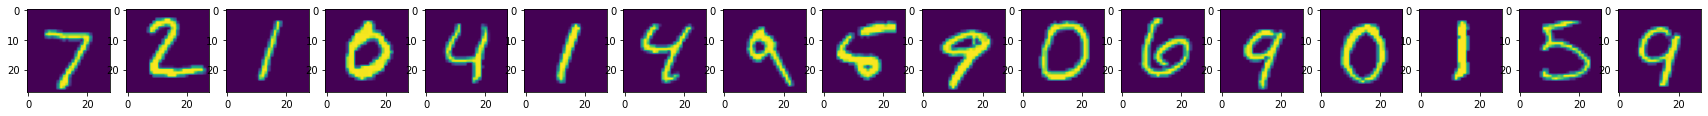

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


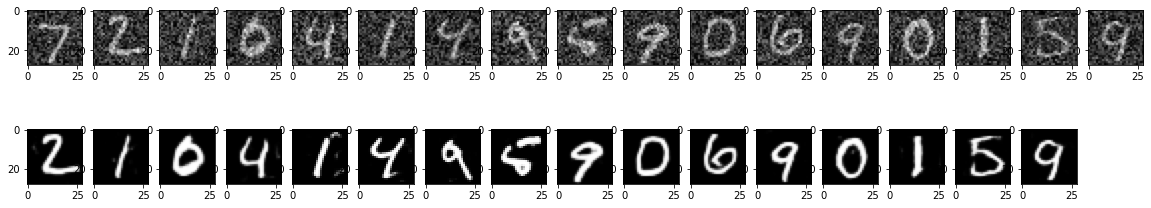

In [7]:
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot the noisy training data
plt.figure(figsize = (30,6))
for i in range(17):
  plt.subplot(1, 17, i+1)
  plt.imshow(x_test[i].reshape(28,28))
plt.show()

plt.figure(figsize=(20,4))
for i in range(17):
  plt.subplot(2, 17, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()

  plt.subplot(2, 17, i + 17)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
plt.show()

### Plotting the cost function for the training and validation data

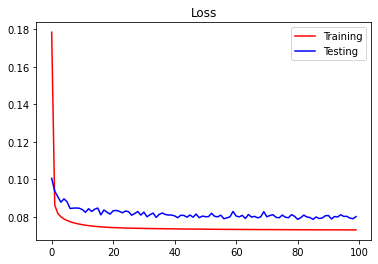

In [10]:
plt.figure(0)
plt.title("Loss")
plt.plot(ok.history['loss'], 'r', label='Training')
plt.plot(ok.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

### Plotting the accuracy for training and validation data

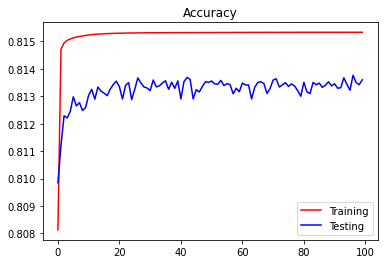

In [14]:
plt.figure(1)
plt.title("Accuracy")
plt.plot(ok.history['accuracy'], 'r', label='Training')
plt.plot(ok.history['val_accuracy'], 'b', label='Testing')
plt.legend()
plt.show()